In [1]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import tensorflow as tf

Using TensorFlow backend.


In [5]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [6]:
def create_encoding_layers(units = [128, 64, 32]):
    return [Dense(u, activation='relu') for u in units]

def create_decoding_layers(units = [64, 128, 784]):
    return [Dense(u, activation='relu' if i < len(units) -1 else 'sigmoid') for i, u in enumerate(units)]

def connect_layers(input, layers):
    for i,l in enumerate(layers):
        if i == 0:
            layer = l(input)
        else:
            layer = l(layer)
    return layer

def create_encoders(input_dim = 784, layers_dim = [128, 64], encoding_dim = 32):    
    normal_input  = Input(shape=(input_dim,))
    encoded_input = Input(shape=(encoding_dim,))

    encoding_layers = create_encoding_layers(layers_dim + [encoding_dim])
    layers_dim.reverse()
    decoding_layers = create_decoding_layers(layers_dim + [input_dim])

    encoded = connect_layers(normal_input, encoding_layers)
    decoded = connect_layers(encoded, decoding_layers)
    semi_decoded = connect_layers(encoded_input, decoding_layers)

    autoencoder = Model(normal_input, decoded)
    encoder = Model(normal_input, encoded)
    decoder = Model(encoded_input, semi_decoded)

    return autoencoder, encoder, decoder

In [18]:
def fit(autoencoder, epochs = 50, loss = 'binary_crossentropy'):
    autoencoder.compile(optimizer='adadelta', loss = loss)
    autoencoder.fit(x_train, x_train,
                    epochs=epochs,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test, x_test))

In [8]:
def check(encoder, decoder):
    encoded_imgs = encoder.predict(x_test)
    decoded_imgs = decoder.predict(encoded_imgs)
    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s - loss: 0.1331 - val_loss: 0.0729
Epoch 2/50
60000/60000 [==============================] - 1s - loss: 0.0709 - val_loss: 0.0696
Epoch 3/50
60000/60000 [==============================] - 1s - loss: 0.0686 - val_loss: 0.0675
Epoch 4/50
60000/60000 [==============================] - 1s - loss: 0.0663 - val_loss: 0.0646
Epoch 5/50
60000/60000 [==============================] - 1s - loss: 0.0630 - val_loss: 0.0609
Epoch 6/50
60000/60000 [==============================] - 1s - loss: 0.0593 - val_loss: 0.0573
Epoch 7/50
60000/60000 [==============================] - 1s - loss: 0.0562 - val_loss: 0.0544
Epoch 8/50
60000/60000 [==============================] - 1s - loss: 0.0536 - val_loss: 0.0519
Epoch 9/50
60000/60000 [==============================] - 1s - loss: 0.0513 - val_loss: 0.0497
Epoch 10/50
60000/60000 [==============================] - 1s - loss: 0.0492 - val_loss: 0.0477

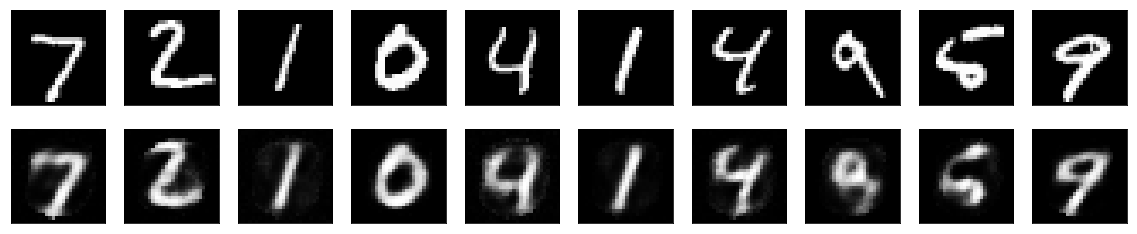

In [22]:
autoencoder, encoder, decoder = create_encoders(784, [], 32)
fit(autoencoder, epochs=50, loss = 'mean_squared_error')
check(encoder, decoder)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s - loss: 0.3692 - val_loss: 0.2721
Epoch 2/50
60000/60000 [==============================] - 1s - loss: 0.2644 - val_loss: 0.2531
Epoch 3/50
60000/60000 [==============================] - 1s - loss: 0.2429 - val_loss: 0.2307
Epoch 4/50
60000/60000 [==============================] - 1s - loss: 0.2228 - val_loss: 0.2128
Epoch 5/50
60000/60000 [==============================] - 1s - loss: 0.2076 - val_loss: 0.1999
Epoch 6/50
60000/60000 [==============================] - 1s - loss: 0.1964 - val_loss: 0.1902
Epoch 7/50
60000/60000 [==============================] - 1s - loss: 0.1877 - val_loss: 0.1824
Epoch 8/50
60000/60000 [==============================] - 1s - loss: 0.1806 - val_loss: 0.1759
Epoch 9/50
60000/60000 [==============================] - 1s - loss: 0.1747 - val_loss: 0.1706
Epoch 10/50
60000/60000 [==============================] - 1s - loss: 0.1697 - val_loss: 0.1659

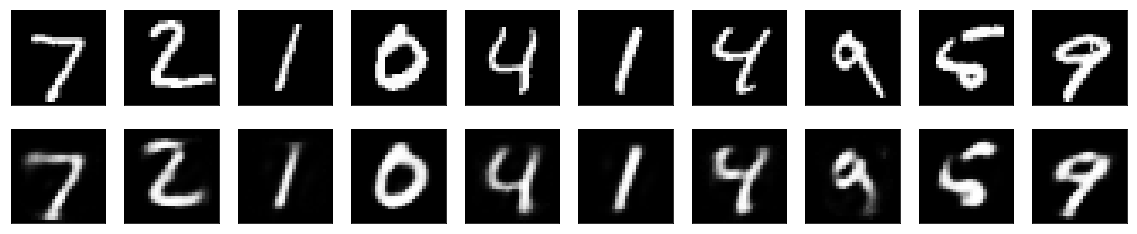

In [9]:
autoencoder, encoder, decoder = create_encoders(784, [], 32)
fit(autoencoder)
check(encoder, decoder)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 2s - loss: 0.3084 - val_loss: 0.2390


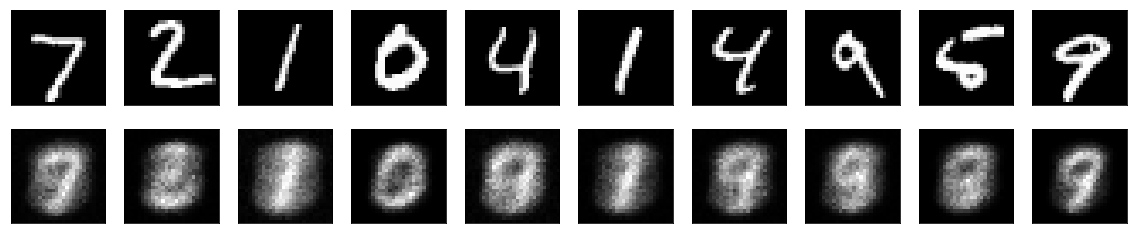

In [14]:
autoencoder, encoder, decoder = create_encoders(784, [], 784)
fit(autoencoder, epochs=1)
check(encoder, decoder)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s - loss: 0.3480 - val_loss: 0.2649
Epoch 2/50
60000/60000 [==============================] - 1s - loss: 0.2562 - val_loss: 0.2422
Epoch 3/50
60000/60000 [==============================] - 1s - loss: 0.2283 - val_loss: 0.2137
Epoch 4/50
60000/60000 [==============================] - 1s - loss: 0.2027 - val_loss: 0.1909
Epoch 5/50
60000/60000 [==============================] - 1s - loss: 0.1853 - val_loss: 0.1775
Epoch 6/50
60000/60000 [==============================] - 1s - loss: 0.1737 - val_loss: 0.1675
Epoch 7/50
60000/60000 [==============================] - 1s - loss: 0.1653 - val_loss: 0.1604
Epoch 8/50
60000/60000 [==============================] - 1s - loss: 0.1590 - val_loss: 0.1549
Epoch 9/50
60000/60000 [==============================] - 1s - loss: 0.1532 - val_loss: 0.1487
Epoch 10/50
60000/60000 [==============================] - 1s - loss: 0.1478 - val_loss: 0.1442

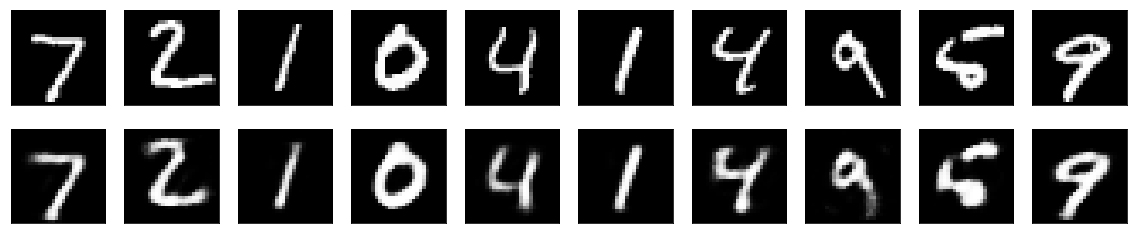

In [10]:
autoencoder, encoder, decoder = create_encoders(784, [128], 64)
fit(autoencoder)
check(encoder, decoder)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s - loss: 0.3230 - val_loss: 0.2584
Epoch 2/50
60000/60000 [==============================] - 2s - loss: 0.2539 - val_loss: 0.2506
Epoch 3/50
60000/60000 [==============================] - 2s - loss: 0.2449 - val_loss: 0.2402
Epoch 4/50
60000/60000 [==============================] - 2s - loss: 0.2256 - val_loss: 0.2131
Epoch 5/50
60000/60000 [==============================] - 2s - loss: 0.2063 - val_loss: 0.1996
Epoch 6/50
60000/60000 [==============================] - 2s - loss: 0.1948 - val_loss: 0.1879
Epoch 7/50
60000/60000 [==============================] - 2s - loss: 0.1814 - val_loss: 0.1757
Epoch 8/50
60000/60000 [==============================] - 2s - loss: 0.1732 - val_loss: 0.1677
Epoch 9/50
60000/60000 [==============================] - 2s - loss: 0.1678 - val_loss: 0.1642
Epoch 10/50
60000/60000 [==============================] - 2s - loss: 0.1635 - val_loss: 0.1608

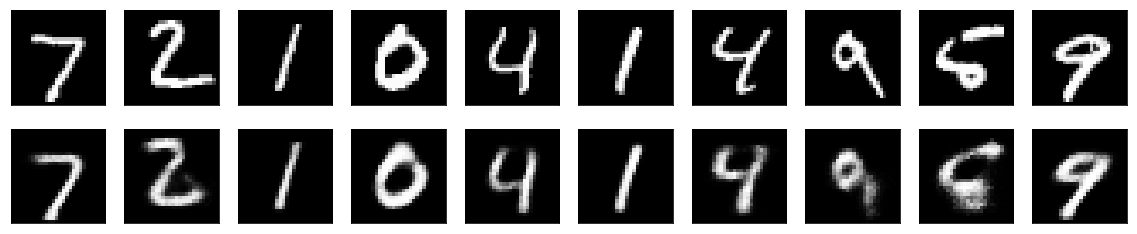

In [11]:
autoencoder, encoder, decoder = create_encoders(784, [512, 128, 64], 32)
fit(autoencoder)
check(encoder, decoder)

In [15]:
x_train.shape

(60000, 784)